# Pyber Ride-Hailing Analysis 

***


### Summary of Data Analysis

***

__Trends Observed__

Our company Pyber has a presence in three types of regions: Urban, Suburban and Rural. However, there is an uneven distribution amongst these three regions. The Average Fare, Number of Rides and Total Number of Drivers are dependent upon each specific region. Of the aforementioned metrics __Average Fare__ seemed to be the most important and was the one I chose to focus upon. After all, we're in the business of understanding how our app benefits both user types: Ride-hailer and Driver. Money Talks, everything else walks! 

 __(1) Average Fare and Number of Rides__

- Based on the data, it became clear that the Average Fare charged and the Number of Rides ride-hailers took were directly correlated. Like many things, Average Fare(s) charged in the regions we serve followed a Hiearchial pattern. To clarify, Urban regions have the lowest Average Fares charged, Suburban regions have the centermost Average Fares charged and Rural regions have the highest Average Fares charged. This brings us to our correlation between Average Fare and Number of Rides. It seems that regions with lower fares had more rides hailed. For example, Urban areas had the lowest Average Fare and the highest number of rides hailed. This would suggest that the ride-hailing user in each region prefers a lower fare and that it is a contribution to how many rides are taken in a region. With this alone we cannot determine if Average Fares is a fair metric of measurement. Our next correlation, makes things more clear. 

__(2) Average Fare and Total Drivers__

- 



In [15]:
#Dependencies and File Paths
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#File Paths
ride_data_path = "Data/ride_data.csv"
city_data_path = "Data/city_data.csv"

#Read file(s)

ride_data_df = pd.read_csv(ride_data_path)
city_data_df = pd.read_csv(city_data_path)



In [16]:
#Preview DataFrames: Print the heads of both DataFrames

print(ride_data_df.head())
print(city_data_df.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [17]:
#Merge DataFrames: Merge on 'city' column

merged_data = pd.merge(ride_data_df,city_data_df,on="city", how="left")
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Share Data (by City type)
***

### Calculations for Bubble Plot

In [18]:
#Create DataFrames for each City Type

urban_cities = merged_data[merged_data["type"] == "Urban"].groupby("city")
suburban_cities = merged_data[merged_data["type"] == "Suburban"].groupby("city")
rural_cities = merged_data[merged_data["type"] == "Rural"].groupby("city")

In [19]:
#Calcuations for Urban Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_urban = urban_cities["ride_id"].count()
y_urban = urban_cities["fare"].mean()
s_urban = urban_cities["driver_count"].mean()

In [20]:
#Calcuations for Sub-Urban Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_suburban = suburban_cities["ride_id"].count()
y_suburban = suburban_cities["fare"].mean()
s_suburban = suburban_cities["driver_count"].mean()


In [21]:
#Calcuations for Rural Cities: Ride Count, Average Fare, Average Driver Count (for size)

x_rural = rural_cities["ride_id"].count()
y_rural=  rural_cities["fare"].mean()
s_rural = rural_cities["driver_count"].mean()

### Bubble Plot (Configuration and Visualization)

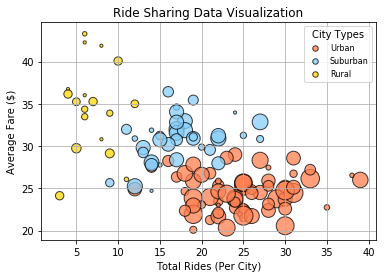

In [22]:
#Scatter Plots for each City type

plt.scatter(x_urban, y_urban, label="Urban", s=s_urban * 5, color=["coral"], edgecolor="black",alpha=0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label="Suburban", s=s_suburban * 10, color=["lightskyblue"], edgecolor="black",alpha=0.75, marker="o")
plt.scatter(x_rural, y_rural, label="Rural", s=s_rural * 10, color=["gold"], edgecolor="black",alpha=0.75, marker="o")

#Set grid equal to true

plt.grid()

#Add graph labels: x, y, title

plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Ride Sharing Data Visualization")

#Add legend and adjust legend size

legend = plt.legend(fontsize=8, title='City Types', loc='best')
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Save the image
plt.savefig("Images/PyberVisualization.png")

#Show plot
plt.show()

## Data Analysis (by City type): Total Rides | Total Drivers | Total Fares
***

### Data Manipulation

In [23]:
#Create new DataFrame: city_types
city_types = merged_data.groupby(['type'])
city_types.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


### Total Rides (Analysis and Visualization)

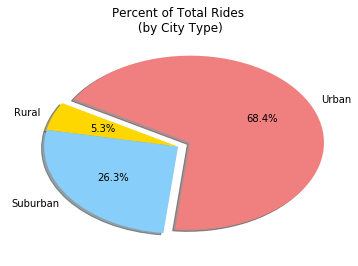

In [24]:
#Calculate Total of rides for each city
total_rides = city_types.ride_id.count()
total_rides

#Pie Graph Settings

labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Rides\n (by City Type)")

#Save Total Rides image
plt.savefig('Images/TotalRides.png')

#Finished Pie Graph: Percent of Total Rides
plt.show()

### Total Drivers (Analysis and Visualizatoin)

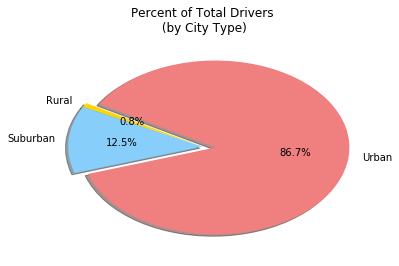

In [25]:
#Calculate Total of rides for each city
total_drivers = city_types.driver_count.sum()
total_drivers

#Pie Graph Settings

labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Drivers\n (by City Type)")

#Save Total Rides image
plt.savefig('Images/TotalDrivers.png')

#Finished Pie Graph: Percent of Total Rides
plt.show()

### Total Fares (Analysis and Visualizatoin)

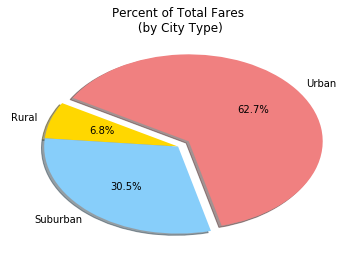

In [26]:
#Calculate Total of rides for each city
total_fares = city_types.fare.sum()
total_fares

#Pie Graph Settings

labels = ["Rural","Suburban","Urban"]
explode = (0,0,0.1)
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Fares\n (by City Type)")

#Save Total Rides image
plt.savefig('Images/TotalFares.png')

#Finished Pie Graph: Percent of Total Rides
plt.show()